In [3]:
import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [4]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-0GVNKEJ\SQLEXPRESS;'
                      'Database=RaceData;'
                      'Trusted_Connection=yes;')

In [5]:
race_id_LL15 = '20004696', '10004696', '20004770', '10004770', '20003316', '10003316', '20001441', '10001441', '1786', '1765', '1944', '1940', '20002207', '10002207', '20002037', '10002037', '20001892', '10001892', '20002288', '10002288', '20002589', '10002589', '20002738', '10002738', '20002467', '10002467', '20002409', '10002409', '20002390', '10002390', '20002754', '10002754', '20002739', '10002739', '20002711', '10002711', '20002710', '10002710', '20002985', '10002985', '2932', '2949', '2936', '2950', '2918', '2922', '3086', '3089', '3090', '3092', '3071'
race_id_LL30 = '20004697', '10004697', '20004771', '10004771', '20003317', '10003317', '20001437', '10001437', '1506', '1507', '1540', '1554', '1544', '1555', '1549', '1553', '1551', '1552', '1626', '1984', '2015', '2183', '2233', '2182', '2234', '2185', '2228', '2179', '2220', '2184', '2219', '2422', '2475', '2545', '2553', '2544', '2552', '2549', '2554', '2828', '2832', '2816', '2826', '2834', '2817', '2829', '2818', '2825', '2820', '2830', '2997', '3006', '2998', '3005', '2999', '3004', '3000', '3003', '3001', '3002'


In [6]:
df_15 = pd.DataFrame()

for race in race_id_LL15:
    runners = pd.read_sql_query(f'SELECT COUNT(*) FROM RaceData.dbo.RaceData WHERE RaceID={race}',conn)
    year = pd.read_sql_query(f'SELECT Year FROM RaceData.dbo.Race WHERE RaceID={race}',conn)
    gender = pd.read_sql_query(f'SELECT Gender FROM RaceData.dbo.Race WHERE RaceID={race}' ,conn)
    new_row = {'Year':year.iloc[0]['Year'], 'Gender':gender.iloc[0]['Gender'], 'Runners':runners.iloc[0][0]}
    df_15 = df_15.append(new_row, ignore_index=True)

years = df_15.Year.unique()
df_prop_15 = pd.DataFrame()

for year in years:
    total_w = df_15.loc[(df_15['Gender'] == 'W') & (df_15['Year'] == year), 'Runners'].sum()
    total_m = df_15.loc[(df_15['Gender'] == 'M') & (df_15['Year'] == year), 'Runners'].sum()
    prop_m = total_m/(total_w + total_m)
    prop_w = total_w/(total_w + total_m)
    if prop_m != 0:
        new_row = {'Year':year, 'total_m':total_m, 'total_w':total_w, 'Proportion_M':prop_m, 'Proportion_W':prop_w}
        df_prop_15 = df_prop_15.append(new_row, ignore_index=True)
    df_prop_15['Year'] = df_prop_15['Year'].astype(np.int64)


In [10]:
df_30 = pd.DataFrame()

for race in race_id_LL30:
    runners = pd.read_sql_query(f'SELECT COUNT(*) FROM RaceData.dbo.RaceData WHERE RaceID={race}',conn)
    year = pd.read_sql_query(f'SELECT Year FROM RaceData.dbo.Race WHERE RaceID={race}',conn)
    gender = pd.read_sql_query(f'SELECT Gender FROM RaceData.dbo.Race WHERE RaceID={race}' ,conn)
    if runners.iloc[0][0] > 0:
        new_row = {'Year':year.iloc[0]['Year'], 'Gender':gender.iloc[0]['Gender'], 'Runners':runners.iloc[0][0]}
        df_30 = df_30.append(new_row, ignore_index=True)

years = df_30.Year.unique() 
df_prop_30 = pd.DataFrame()

for year in years:
    total_w = df_30.loc[(df_30['Gender'] == 'W') & (df_30['Year'] == year), 'Runners'].sum()
    total_m = df_30.loc[(df_30['Gender'] == 'M') & (df_30['Year'] == year), 'Runners'].sum()
    prop_m = total_m/(total_w + total_m)
    prop_w = total_w/(total_w + total_m)
    if prop_m != 0:
        new_row = {'Year':year, 'total_m':total_m, 'total_w':total_w, 'Proportion_M':prop_m, 'Proportion_W':prop_w}
        df_prop_30 = df_prop_30.append(new_row, ignore_index=True)
    df_prop_30['Year'] = df_prop_30['Year'].astype(np.int64)


AttributeError: 'DataFrame' object has no attribute 'Year'

# Antal och andel kvinnor/män som sprungit Lidingöloppet 15K/30K

NameError: name 'df_prop_30' is not defined

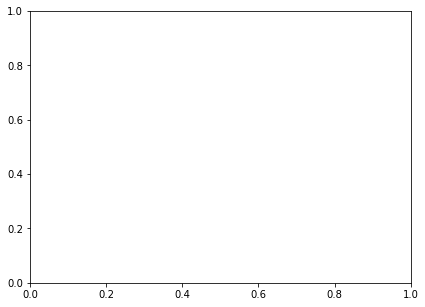

In [11]:
plt.subplot(1,2,1)
x1 = df_prop_30['Year']
x2 = df_prop_15['Year']
y1 = df_prop_30['total_m']
y2 = df_prop_15['total_m']
plt.plot(x1,y1, label="30K")
plt.plot(x2,y2, label="15K")
plt.xticks(range(df_prop_30['Year'].min(),df_prop_30['Year'].max(),2))
plt.title("Totalt Män 15K/30K")
plt.xlabel("Year")
plt.ylabel("Total Men")
leg = plt.legend();

plt.subplot(1,2,2)
x1 = df_prop_30['Year']
x2 = df_prop_15['Year']
y1 = df_prop_30['total_w']
y2 = df_prop_15['total_w']
plt.plot(x1,y1, label="30K")
plt.plot(x2,y2, label="15K")
plt.xticks(range(df_prop_30['Year'].min(),df_prop_30['Year'].max(),2))
plt.title("Totalt Kvinnor 15K/30K")
plt.xlabel("Year")
plt.ylabel("Total Men")
leg = plt.legend();
plt.show()

plt.subplot(1,2,1)
x1 = df_prop_30['Year']
x2 = df_prop_15['Year']
y1 = df_prop_30['Proportion_M']
y2 = df_prop_15['Proportion_M']
plt.plot(x1,y1, label="30K")
plt.plot(x2,y2, label="15K")
plt.xticks(range(df_prop_30['Year'].min(),df_prop_30['Year'].max(),2))
plt.title("Andel Män 15K/30K")
plt.xlabel("Year")
plt.ylabel("Total Men")
leg = plt.legend();

plt.subplot(1,2,2)
x1 = df_prop_30['Year']
x2 = df_prop_15['Year']
y1 = df_prop_30['Proportion_W']
y2 = df_prop_15['Proportion_W']
plt.plot(x1,y1, label="30K")
plt.plot(x2,y2, label="15K")
plt.xticks(range(df_prop_30['Year'].min(),df_prop_30['Year'].max(),2))
plt.title("Andel Kvinnor 15K/30K")
plt.xlabel("Year")
plt.ylabel("Total Men")
leg = plt.legend();
plt.show()


# Time range

## Jämföra elittider över tid mot motionärstider över tid
1. Genomsnitt av topp 10 för varje år
    a. Hämta race data för varje år
    b. Plocka ut place 1-10
    c. Spara i df med col year, gender och avg elite time
2. Vilken tid för att bli top 5 % för varje år
3. Vilken tid för att bli 50 % för varje år

In [32]:
def get_times(race_id_list):
    race_id = race_id_list
    df = pd.DataFrame()

    for race in race_id:
        year = pd.read_sql_query(f'SELECT Year FROM RaceData.dbo.Race WHERE RaceID={race}',conn)
        gender = pd.read_sql_query(f'SELECT Gender FROM RaceData.dbo.Race WHERE RaceID={race}' ,conn)
        runners = pd.read_sql_query(f'SELECT COUNT(*) FROM RaceData.dbo.RaceData WHERE RaceID={race}',conn)
        avg_elite = pd.read_sql_query(f'SELECT Time FROM RaceData.dbo.RaceData WHERE (RaceID={race}) AND (Place BETWEEN 1 AND 10)' ,conn)
        avg_sub_elite = pd.read_sql_query(f'SELECT Time FROM RaceData.dbo.RaceData WHERE (RaceID={race}) AND (Place=FLOOR({runners.iloc[0][0]}*0.05))' ,conn)
        avg_jogger = pd.read_sql_query(f'SELECT Time FROM RaceData.dbo.RaceData WHERE (RaceID={race}) AND (Place=FLOOR({runners.iloc[0][0]}*0.5))' ,conn)
        
        i = 1
        while avg_sub_elite.empty:
            avg_sub_elite = pd.read_sql_query(f'SELECT Time FROM RaceData.dbo.RaceData WHERE (RaceID={race}) AND (Place=FLOOR({runners.iloc[0][0]}*0.05)+{i})' ,conn)
            i += 1
        
        j = 1
        while avg_jogger.empty:
            avg_jogger = pd.read_sql_query(f'SELECT Time FROM RaceData.dbo.RaceData WHERE (RaceID={race}) AND (Place=FLOOR({runners.iloc[0][0]}*0.5)+{j})' ,conn)
            j += 1
        
        avg_elite["Time"] = pd.to_datetime(avg_elite["Time"])
        avg_elite = avg_elite['Time'].mean()
        if pd.isna(avg_elite):
            avg_elite = None
        else:
            avg_elite = avg_elite.time()
            avg_elite = avg_elite.strftime('%H:%M:%S.%f')
            avg_elite = avg_elite[:-7]

        new_row = {'Year':year.iloc[0]['Year'], 'Gender':gender.iloc[0]['Gender'], 'AVG_ELITE':avg_elite, 'AVG_SUB_ELITE':avg_sub_elite.iloc[0][0], 'AVG_JOGGER':avg_jogger.iloc[0][0]}
        if year.iloc[0]['Year'] != 2020:
            df = df.append(new_row, ignore_index=True)
        
    df = df[['Year', 'Gender', 'AVG_JOGGER', 'AVG_SUB_ELITE', 'AVG_ELITE']]
    
    return df

In [67]:
import matplotlib.dates as mdates

x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").dt.date() for d in dates]

print(x_values)

df = get_times(race_id_LL15)

dates = ["01/02/2020", "01/03/2020", "01/04/2020"]




datetime = pd.to_datetime(df['AVG_JOGGER'][df['Gender'] == 'M']).dt.time
str_time = datetime.astype(str)
str_time = str_time.tolist()
print(str_time)

matplot_time = [datetime.datetime.strptime(d,"%H:%M:%S").time() for d in str_time]
print(matplot_time)

plt.subplot(1,2,1)
x1 = df['Year'][df['Gender'] == 'M']
y1 = matplot_time
plt.plot(x1,y1, label="30K")
plt.title("Totalt Män 15K/30K")
plt.xlabel("Year")
plt.ylabel("Total Men")
leg = plt.legend()
plt.show()

AttributeError: 'Series' object has no attribute 'datetime'

## Vilket år hade minst/mest konkurrens?